In [1]:
import pandas as pd
import os

from maca import clean_annotation, clean_labels

metadata_folder = os.path.join('..', 'metadata' )

annotation_folder = os.path.join(metadata_folder, 'manual_annotations')
# annotation_folder

summary_folder = os.path.join(metadata_folder, 'summary')
! mkdir $summary_folder


mkdir: ../metadata/summary: File exists


In [12]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Editable text and proper LaTeX fonts in illustrator
matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True

# Editable fonts. 42 is the magic number
matplotlib.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
matplotlib.rcParams['mathtext.fontset'] = 'cm'
%matplotlib inline

sns.set(style='whitegrid', context='paper')

/Users/olgabot/anaconda3/envs/maca/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [7]:
folder = os.path.join(metadata_folder, 'number_of_cells_reads_genes/')

In [11]:
import glob
import os 

globber = f'{folder}/*_nreads_ngenes.csv'

dfs = []

for filename in glob.iglob(globber):
    df = pd.read_csv(filename, index_col=0)
    df['tissue'] = os.path.basename(filename).split('_nreads_ngenes.csv')[0]
    dfs.append(df)
nreads_ngenes = pd.concat(dfs)

print(nreads_ngenes.shape)
print(len(nreads_ngenes.groupby('tissue')))
nreads_ngenes.head()

(50791, 4)
22


,nGene,nReads,orig.ident,tissue
A21.MAA000594.3_8_M.1.1,3850,1848089,Heart,Aorta
F8.MAA000594.3_8_M.1.1,788,55689,Heart,Aorta
H11.MAA000594.3_8_M.1.1,554,318135,Heart,Aorta
A22.MAA000594.3_8_M.1.1,1279,270173,Heart,Aorta
H12.MAA000594.3_8_M.1.1,946,278892,Heart,Aorta


In [13]:
nreads_ngenes['log10 nReads'] = np.log10(nreads_ngenes['nReads'])

In [14]:
colors = pd.read_csv(os.path.join(metadata_folder, 'tissue_colors.csv'), index_col=0, squeeze=True)
colors

Aorta              #1f77b4
Bladder            #aec7e8
Brain_Microglia    #ff7f0e
Brain_Neurons      #ffbb78
Colon              #2ca02c
Diaphragm          #98df8a
Fat                #d62728
Heart              #ff9896
Kidney             #9467bd
Liver              #c5b0d5
Lung               #8c564b
Mammary            #c49c94
Marrow             #e377c2
Muscle             #f7b6d2
Pancreas           #7f7f7f
Skin               #c7c7c7
Spleen             #bcbd22
Thymus             #dbdb8d
Tongue             #17becf
Trachea            #9edae5
Name: color, dtype: object

In [15]:
# Replace underscores with spaces for LaTeX happiness
nreads_ngenes['tissue'] = nreads_ngenes['tissue'].str.replace('_', ' ')
colors.index = colors.index.str.replace('_', ' ')
cell_annotations['tissue'] = cell_annotations['tissue'].str.replace('_', ' ')

In [16]:
tissues = sorted(cell_annotations['tissue'].unique())
tissues

['Aorta',
 'Bladder',
 'Brain (Microglia)',
 'Brain (Non-microglia)',
 'Colon',
 'Diaphragm',
 'Fat',
 'Heart',
 'Kidney',
 'Liver',
 'Lung',
 'Mammary',
 'Marrow',
 'Muscle',
 'Pancreas',
 'Skin',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea']

In [17]:
kwargs = dict(data=nreads_ngenes, row='tissue', facet_kws=dict(sharex=True),
               row_order=tissues, palette=colors, xlabel_suffix='')

In [20]:
n_cells_per_tissue = nreads_ngenes.groupby('tissue').size().reset_index()
n_cells_per_tissue = n_cells_per_tissue.rename(columns={0: 'n_cells'})
n_cells_per_tissue

,tissue,n_cells
0,Aorta,364
1,Bladder,1287
2,Brain (Microglia),4365
3,Brain (Non-microglia),3000
4,Brain Microglia,4365
5,Brain Neurons,3000
6,Colon,3459
7,Diaphragm,870
8,Fat,4709
9,Heart,4585


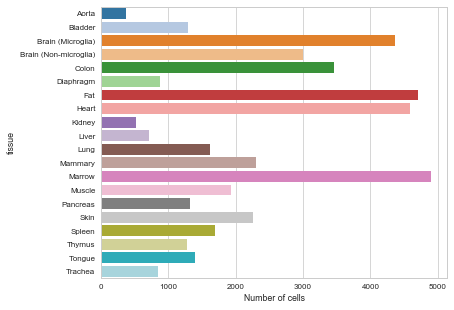

In [21]:
fig, ax = plt.subplots()
sns.barplot(x='n_cells', y='tissue', data=n_cells_per_tissue, palette=colors, order=tissues)
ax.set(xlabel='Number of cells')
fig.tight_layout()
fig.savefig(f'{figure1_folder}/barplot_n_cells_per_tissue.pdf')